### Import

In [1]:
import pandas as pd
import warnings;warnings.filterwarnings(action='ignore')

### Read Data

In [2]:
data = pd.read_parquet('../data/DataCleansing_final.pqt')

### 클래식
- 서양 고전음악을 클래식이라 한다.
- 악기를 사용하는 클래식엔 중주, 실내악, 협주곡, 교향곡, 독주, 관현악 등이 있으며 성악 중엔 독창, 중창, 합창, 가곡, 오페라 등이 있다.<br>
  $\bullet$ 교향곡은 현악기(바이올린, 첼로, 비올라 등)와 관악기(플루트, 바순, 오보에 등) 외 다양한 악기들이 참여하는 오케스트라 연주이다.<br>
  $\bullet$ 성악은 성악가가 노래하는 것으로 일부 성악 공연은 합창이나 오페라로 구분되기도 한다.
- [참고] https://m.blog.naver.com/arum7885/220684940660
- [참고] https://m.blog.naver.com/arum7885/220685401708

### 클래식 음악 인기가 저조한 이유
- 다른 장르에 비해 고지식하다. 과거 클래식 음악을 생활 속에서 음악으로 이해하지 않고 상류사회 진입을 위한 수단으로 인식했다.
- 조예가 깊은 사람만이 연주자별, 연주곡별 공연 차이를 알아채지 이외의 사람들은 인지하지 못해 다른 장르를 더 선호한다.
- 뮤지컬, 연극과 달리 공연자와 관객이 소통, 상호작용하지 않는다.
- https://www.yna.co.kr/view/AKR20170116181000005

### 클래식 공연 반응요소
- 연주곡목에 따라 관람을 고려한다. 곡명을 보고 예매를 결정한다는 것은 사전지식이 많은 사람들이 주로 관람한다는 것을 유추해낼 수 있다.<br> https://www.hankyung.com/article/2017021350551
- 공연제목의 100주년, 200주년 등의 숫자에 반응한다.<br>
  https://stompmusic.tistory.com/317

### 콘서트홀 구조
- [참고] https://m.blog.naver.com/sohyeppy/222610113033
- [참고] https://m.blog.naver.com/sohyeppy/222583379685

### 장르별 인기 좌석

In [3]:
data.drop_duplicates('performance_label')['genre'].value_counts()

교향곡    344
클래식    146
합창      69
독주      39
성악      28
실내악     26
Name: genre, dtype: int64

#### $\blacktriangleright$ 교향곡
교향곡은 주로 연주자가 보이는 지, 음향 질이 어떤 지를 좌석 구매 시 주요하게 따져본다.<br>
$\bullet$ 좋은 좌석
- [G1] 1층 B ~ D블록 8 ~ 14열: 더 풍부하고 웅장한 음향을 즐길 수 있는 좌석
- [G2] 2층 A ~ D블록 1 ~ 3열 & 3층 B ~ F블록 1~2열: 무대가 잘 보이고 소리가 조화롭게 섞이는 좌석
  - 강한 소리를 내는 악기들은 상대적으로 멀리 있고 바이올린이 가까이 있기 때문에 자연스럽게 볼륨이 조절되기 때문이다.
  - 2층 대비 3층은 소리가 좀 작게 들린다.
- [G3] 합창석: 오케스트라와 지휘자의 손동작, 표정 등을 가까이에서 볼 수 있는 좌석
- [G4] 1층 A, E 15열: 다리를 뻗을 수 있는 좌석
- [G5] 2층 BOX1, BOX4: 소리가 잘 들리며 좌석별 높이(단차)가 커 다른 관객과 독립된 좌석

$\bullet$ 안좋은 좌석
- [B1] 1층 A ~ E블록 1 ~ 5열: 악기 생소리나 연주자들 호흡 소리가 들려 방해되며 한쪽에 치우쳐 앉을 경우 특정 악기 소리만 강하게 들리는 좌석
- [B2] 2층 E블록: 지휘자가 보통 왼쪽에서 지휘하기에 뒷모습을 보게 되며 소리가 막히는 좌석
- [B3] 3층 M, N블록: 앞 블록 관객이 입장해야만 입장가능하며 공연 중 지나가는 사람들로 시야가 방해되는 좌석
- [B4] 1층 A ~ E블록 17열 이후: 2층 밑부분과 맞닿아 있어 소리가 먹히는 좌석

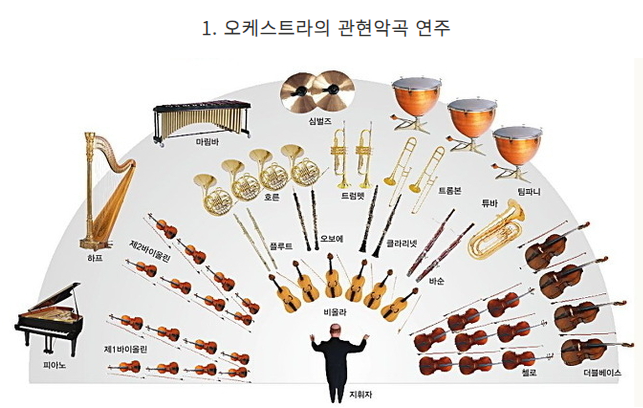

$\bullet$  [출처] https://www.hani.co.kr/arti/culture/music/597158.html<br>
$\bullet$  [출처] https://www.khan.co.kr/culture/culture-general/article/201908301402011<br>
$\bullet$  [출처] https://m.post.naver.com/viewer/postView.naver?volumeNo=33092456&memberNo=890041<br>
$\bullet$  [출처] https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=gongbanjang&logNo=221356066911

In [4]:
symphony = data.query('genre == "교향곡"')
symphony['열'] = symphony['열'].astype(float)
label = pd.DataFrame(index=symphony.index, columns=['Domain_label'])

In [5]:
label.loc[symphony.query('층 == "1" and 블록 in ["B","C","D"] and (8 <= 열 <= 14)').index, "Domain_label"] = "G1"
label.loc[symphony.query('층 == "2" and 블록 in ["A","B","C","D"] and 열 <= 3').index, "Domain_label"] = "G2"
label.loc[symphony.query('층 == "3" and 블록 in ["B","C","D","E","F"] and 열 <= 2').index, "Domain_label"] = "G2"
label.loc[symphony.query('층 == "합창석"').index, "Domain_label"] = "G3"
label.loc[symphony.query('층 == "1" and 블록 in ["A","E"] and 열 == 15').index, "Domain_label"] = "G4"
label.loc[symphony.query('블록 in ["BOX1","BOX4"]').index, "Domain_label"] = "G5"

In [6]:
label.loc[symphony.query('층 == "1" and 블록 in ["A","B","C","D","E"] and 열 <= 5').index, "Domain_label"] = "B1"
label.loc[symphony.query('층 == "2" and 블록 == "E"').index, "Domain_label"] = "B2"
label.loc[symphony.query('층 == "3" and 블록 in ["N", "M"]').index, "Domain_label"] = "B3"
label.loc[symphony.query('층 == "1" and 블록 in ["A","B","C","D","E"] and 17 <= 열').index, "Domain_label"] = "B4"

In [7]:
symphony['Domain_label'] = label
symphony.Domain_label.value_counts()

B4    68654
B1    58721
G1    56763
G2    29776
B2    24333
G3    22580
B3    10709
G4     5792
G5     3376
Name: Domain_label, dtype: int64

#### $\blacktriangleright$ 클래식
$\bullet$ 좋은 좌석
- [G1] 1층 B ~ D블록 8 ~ 14열: 더 풍부하고 웅장한 음향을 즐길 수 있는 좌석
- [G2] 2층 A ~ D블록 1 ~ 3열 & 3층 B ~ F블록 1~2열: 무대가 잘 보이고 소리가 조화롭게 섞이는 좌석
  - 강한 소리를 내는 악기들은 상대적으로 멀리 있고 바이올린이 가까이 있기 때문에 자연스럽게 볼륨이 조절되기 때문이다.
  - 2층 대비 3층은 소리가 좀 작게 들린다.
- [G3] 합창석: 오케스트라와 지휘자의 손동작, 표정 등을 가까이에서 볼 수 있는 좌석
- [G4] 1층 A, E 15열: 다리를 뻗을 수 있는 좌석
- [G5] 2층 BOX1, BOX4: 소리가 잘 들리며 좌석별 높이(단차)가 커 다른 관객과 독립된 좌석

$\bullet$ 안좋은 좌석
- [B1] 1층 A ~ E블록 1 ~ 5열: 악기 생소리나 연주자들 호흡 소리가 들려 방해되며 한쪽에 치우쳐 앉을 경우 특정 악기 소리만 강하게 들리는 좌석
- [B2] 2층 E블록: 지휘자가 보통 왼쪽에서 지휘하기에 뒷모습을 보게 되며 소리가 막히는 좌석
- [B3] 3층 M, N블록: 앞 블록 관객이 입장해야만 입장가능하며 공연 중 지나가는 사람들로 시야가 방해되는 좌석
- [B4] 1층 A ~ E블록 17열 이후: 2층 밑부분과 맞닿아 있어 소리가 먹히는 좌석


In [8]:
classic = data.query('genre == "클래식"')
classic['열'] = classic['열'].astype(float)
label = pd.DataFrame(index=classic.index, columns=['Domain_label'])

In [9]:
label.loc[classic.query('층 == "1" and 블록 in ["B","C","D"] and (8 <= 열 <= 14)').index, "Domain_label"] = "G1"
label.loc[classic.query('층 == "2" and 블록 in ["A","B","C","D"] and 열 <= 3').index, "Domain_label"] = "G2"
label.loc[classic.query('층 == "3" and 블록 in ["B","C","D","E","F"] and 열 <= 2').index, "Domain_label"] = "G2"
label.loc[classic.query('층 == "합창석"').index, "Domain_label"] = "G3"
label.loc[classic.query('층 == "1" and 블록 in ["A","E"] and 열 == 15').index, "Domain_label"] = "G4"
label.loc[classic.query('블록 in ["BOX1","BOX4"]').index, "Domain_label"] = "G5"

In [10]:
label.loc[classic.query('층 == "1" and 블록 in ["A","B","C","D","E"] and 열 <= 5').index, "Domain_label"] = "B1"
label.loc[classic.query('층 == "2" and 블록 == "E"').index, "Domain_label"] = "B2"
label.loc[classic.query('층 == "3" and 블록 in ["N", "M"]').index, "Domain_label"] = "B3"
label.loc[classic.query('층 == "1" and 블록 in ["A","B","C","D","E"] and 17 <= 열').index, "Domain_label"] = "B4"

In [11]:
classic['Domain_label'] = label
classic.Domain_label.value_counts()

B4    30621
G1    26892
B1    25150
G2    13351
G3    11868
B2    10393
B3     3807
G4     2423
G5     1645
Name: Domain_label, dtype: int64

#### $\blacktriangleright$ 합창

In [12]:
chorus = data.query('genre == "합창"')
chorus['열'] = chorus['열'].astype(float)
label = pd.DataFrame(index=chorus.index, columns=['Domain_label'])

In [13]:
label.loc[chorus.query('층 == "1" and 블록 in ["B","C","D"] and (8 <= 열 <= 14)').index, "Domain_label"] = "G1"
label.loc[chorus.query('층 == "2" and 블록 in ["A","B","C","D"] and 열 <= 3').index, "Domain_label"] = "G2"
label.loc[chorus.query('층 == "3" and 블록 in ["B","C","D","E","F"] and 열 <= 2').index, "Domain_label"] = "G2"
label.loc[chorus.query('층 == "합창석"').index, "Domain_label"] = "G3"
label.loc[chorus.query('층 == "1" and 블록 in ["A","E"] and 열 == 15').index, "Domain_label"] = "G4"
label.loc[chorus.query('블록 in ["BOX1","BOX4"]').index, "Domain_label"] = "G5"

In [14]:
label.loc[chorus.query('층 == "1" and 블록 in ["A","B","C","D","E"] and 열 <= 5').index, "Domain_label"] = "B1"
label.loc[chorus.query('층 == "2" and 블록 == "E"').index, "Domain_label"] = "B2"
label.loc[chorus.query('층 == "3" and 블록 in ["N", "M"]').index, "Domain_label"] = "B3"
label.loc[chorus.query('층 == "1" and 블록 in ["A","B","C","D","E"] and 17 <= 열').index, "Domain_label"] = "B4"

In [15]:
chorus['Domain_label'] = label
chorus.Domain_label.value_counts()

B4    17218
G1    13477
B1    12184
G2     7365
B2     5825
G3     5464
B3     1727
G4     1282
G5      712
Name: Domain_label, dtype: int64

#### $\blacktriangleright$ 독주
$\bullet$ 좋은 좌석
- [G1] 1층 B,C블록 통로좌석 (8열~15열): 연주자의 손이 보이는 좌석 (피아노)
- [G2] 2층 B블록 앞줄 왼쪽편 (1열~5열) : 연주자의 손이 보이는 좌석 (피아노)
- [G3] 합창석: 연주자의 손동작, 표정 등을 가까이에서 볼 수 있는 좌석
- [G4] 1층 A, E 15열: 다리를 뻗을 수 있는 좌석
- [G5] 2층 BOX1, BOX4: 소리가 잘 들리며 좌석별 높이(단차)가 커 다른 관객과 독립된 좌석
- [G6] 2층 C블록 전체

$\bullet$ 안좋은 좌석
- [B1] 1층 A,E블록 1~4열 : 음향 , 울림의혜택에서 가장 벗어남
- [B2] 3층 BOX 7,8,9,10,11,12 앞줄 제외: 시야방해석
- [B3] 3층 M, N블록: 앞 블록 관객이 입장해야만 입장가능하며 공연 중 지나가는 사람들로 시야가 방해되는 좌석


$\bullet$  [출처] https://m.blog.naver.com/esuwan/110029729464  <br>
$\bullet$  [출처]https://www.youtube.com/watch?v=x8VWEvz64cc (도레미언니의 3분 클래식)  <br>
$\bullet$  [출처]https://www.youtube.com/watch?v=0LrNg1_9db4 (달걀TV : 공연뷰의 모든것) <br> 
$\bullet$  [출처]http://car.donga.com/NEWS/View?gid=64191859&date=20140612

In [16]:
solo = data.query('genre == "독주"')
solo['열'] = solo['열'].astype(float)
label = pd.DataFrame(index=solo.index, columns=['Domain_label'])

In [17]:
label.loc[solo.query('층 == "1" and 블록 in ["B"] and 열 in [8,9,10] and 좌석번호 in ["10","11"]').index, "Domain_label"] = "G1"
label.loc[solo.query('층 == "1" and 블록 in ["B"] and 열 in [11,12,13,14] and 좌석번호 in ["11","12"]').index, "Domain_label"] = "G1"
label.loc[solo.query('층 == "1" and 블록 in ["B"] and 열 == 15 and 좌석번호 in ["12","13"]').index, "Domain_label"] = "G1"
label.loc[solo.query('층 == "1" and 블록 in ["C"] and 열 in [8,9,10,11,12,13,14,15] and 좌석번호 in ["1","2"]').index, "Domain_label"] = "G1"
label.loc[solo.query('층 == "2" and 블록 in ["B"] and 열 in [1,2,3,4,5]').index, "Domain_label"] = "G2"
label.loc[solo.query('층 == "합창석"').index, "Domain_label"] = "G3"
label.loc[solo.query('층 == "1" and 블록 in ["A","E"] and 열 == 15').index, "Domain_label"] = "G4"
label.loc[solo.query('블록 in ["BOX1","BOX4"]').index, "Domain_label"] = "G5"
label.loc[solo.query('층 == "2" and 블록 in ["C"]').index, "Domain_label"] = "G6"

In [18]:
label.loc[solo.query('층 == "1" and 블록 in ["A","B","C","D","E"] and 열 <= 5').index, "Domain_label"] = "B1"
label.loc[solo.query('층 == "3" and 블록 in ["BOX7","BOX8","BOX9","BOX10","BOX11","BOX12"] and 좌석번호 not in ["1","2","3"]').index, "Domain_label"] = "B2"
label.loc[solo.query('층 == "3" and 블록 in ["N", "M"]').index, "Domain_label"] = "B3"

In [19]:
solo['Domain_label'] = label
solo.Domain_label.value_counts()

G3    8456
B1    7547
G6    2265
G2    1434
G1    1112
B3     906
B2     702
G4     541
G5     460
Name: Domain_label, dtype: int64

#### $\blacktriangleright$ 성악
음향이 좋은지, 성악가의 섬세한 표정이 보이는 지를 고려해 좌석 구매한다.<br>
$\bullet$ 좋은 좌석
- [G1] 1층 A ~ D블록 1 ~ 5열: 성악가의 표정과 소리가 잘 들리는 좌석
- [G2] 2층 B ~ C블록 1 ~ 3열: 시야가 좋고 소리가 잘 전달되는 좌석
- [G3] 1층 A, E 15열: 다리를 뻗을 수 있는 좌석
- [G4] 2층 BOX1, BOX4: 소리가 잘 들리며 좌석별 높이(단차)가 커 다른 관객과 독립된 좌석

$\bullet$ 안좋은 좌석
- [B1] 1층 A ~ E블록 17열 이후: 2층 밑부분과 맞닿아 있어 소리가 먹히는 좌석
- [출처] https://brunch.co.kr/@truth-art/24

In [20]:
voice = data.query('genre == "성악"')
voice['열'] = voice['열'].astype(float)
label = pd.DataFrame(index=voice.index, columns=['Domain_label'])

In [21]:
label.loc[voice.query('층 == "1" and 블록 in ["A","B","C","D"] and 열 <= 5').index, "Domain_label"] = "G1"
label.loc[voice.query('층 == "2" and 블록 in ["B","C"] and 열 <= 3').index, "Domain_label"] = "G2"
label.loc[voice.query('층 == "1" and 블록 in ["A","E"] and 열 == 15').index, "Domain_label"] = "G3"
label.loc[voice.query('블록 in ["BOX1","BOX4"]').index, "Domain_label"] = "G4"

In [22]:
label.loc[voice.query('층 == "1" and 블록 in ["A","B","C","D","E"] and 17 <= 열').index, "Domain_label"] = "B1"

In [23]:
voice['Domain_label'] = label
voice.Domain_label.value_counts()

B1    6367
G1    4828
G2     946
G3     505
G4     272
Name: Domain_label, dtype: int64

#### $\blacktriangleright$ 실내악
$\bullet$ 좋은 좌석
- [G1] 1층 B ~ D블록 8 ~ 14열: 더 풍부하고 웅장한 음향을 즐길 수 있는 좌석
- [G2] 2층 A ~ D블록 1 ~ 3열 & 3층 B ~ F블록 1~2열: 무대가 잘 보이고 소리가 조화롭게 섞이는 좌석
  - 강한 소리를 내는 악기들은 상대적으로 멀리 있고 바이올린이 가까이 있기 때문에 자연스럽게 볼륨이 조절되기 때문이다.
  - 2층 대비 3층은 소리가 좀 작게 들린다.
- [G3] 합창석: 오케스트라와 지휘자의 손동작, 표정 등을 가까이에서 볼 수 있는 좌석
- [G4] 1층 A, E 15열: 다리를 뻗을 수 있는 좌석
- [G5] 2층 BOX1, BOX4: 소리가 잘 들리며 좌석별 높이(단차)가 커 다른 관객과 독립된 좌석
- [G6] 전층의 A, B블록 & BOX1 ~ BOX3 & BOX7~BOX9: 피아노 연주자 손이 잘보이는 좌석

$\bullet$ 안좋은 좌석
- [B1] 1층 A ~ E블록 1 ~ 5열: 악기 생소리나 연주자들 호흡 소리가 들려 방해되며 한쪽에 치우쳐 앉을 경우 특정 악기 소리만 강하게 들리는 좌석
- [B2] 2층 E블록: 지휘자가 보통 왼쪽에서 지휘하기에 뒷모습을 보게 되며 소리가 막히는 좌석
- [B3] 3층 M, N블록: 앞 블록 관객이 입장해야만 입장가능하며 공연 중 지나가는 사람들로 시야가 방해되는 좌석
- [B4] 1층 A ~ E블록 17열 이후: 2층 밑부분과 맞닿아 있어 소리가 먹히는 좌석


In [24]:
chamber = data.query('genre == "실내악"')
chamber['열'] = chamber['열'].astype(float)
label = pd.DataFrame(index=chamber.index, columns=['Domain_label'])

In [25]:
label.loc[chamber.query('층 == "1" and 블록 in ["B","C","D"] and (8 <= 열 <= 14)').index, "Domain_label"] = "G1"
label.loc[chamber.query('층 == "2" and 블록 in ["A","B","C","D"] and 열 <= 3').index, "Domain_label"] = "G2"
label.loc[chamber.query('층 == "3" and 블록 in ["B","C","D","E","F"] and 열 <= 2').index, "Domain_label"] = "G2"
label.loc[chamber.query('층 == "합창석"').index, "Domain_label"] = "G3"
label.loc[chamber.query('층 == "1" and 블록 in ["A","E"] and 열 == 15').index, "Domain_label"] = "G4"
label.loc[chamber.query('블록 in ["BOX1","BOX4"]').index, "Domain_label"] = "G5"
label.loc[chamber.query('층 == "1|2|3" and 블록 in ["A","B"]').index, "Domain_label"] = 'G6'
label.loc[chamber.query('블록 in ["BOX1","BOX2","BOX3","BOX7","BOX8","BOX9"]').index, "Domain_label"] = 'G6'

In [26]:
label.loc[chamber.query('층 == "1" and 블록 in ["A","B","C","D","E"] and 열 <= 5').index, "Domain_label"] = "B1"
label.loc[chamber.query('층 == "2" and 블록 == "E"').index, "Domain_label"] = "B2"
label.loc[chamber.query('층 == "3" and 블록 in ["N", "M"]').index, "Domain_label"] = "B3"
label.loc[chamber.query('층 == "1" and 블록 in ["A","B","C","D","E"] and 17 <= 열').index, "Domain_label"] = "B4"

In [27]:
chamber['Domain_label'] = label
chamber.Domain_label.value_counts()

B4    5199
G1    5064
B1    4689
G2    2148
B2    1806
G3    1063
G6     517
G4     437
B3     278
G5     130
Name: Domain_label, dtype: int64

### Save Data

In [28]:
data = pd.concat([symphony, classic, chorus, solo, voice, chamber]).sort_index()
print(f'데이터 크기: {data.shape}')

data.to_parquet('../data/DataCleansing.pqt')

데이터 크기: (924321, 40)
